# House Sales in King County, USA
- Objectives : Predict house price based on bedrooms, bathrooms, square feet living space, square feet land space, floors, waterfront, view, condition, grade, square feet above ground level, square feet basement, year built, year renovated, zipcode, lattitude, longitude, square feet living space for near 15 neighbor, square feet land space of near 15 neighbor

### Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x:'%.2f' % x)

### Load the raw data

In [2]:
raw_data = pd.read_csv('kc_house_data.csv')
raw_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


### Data Description

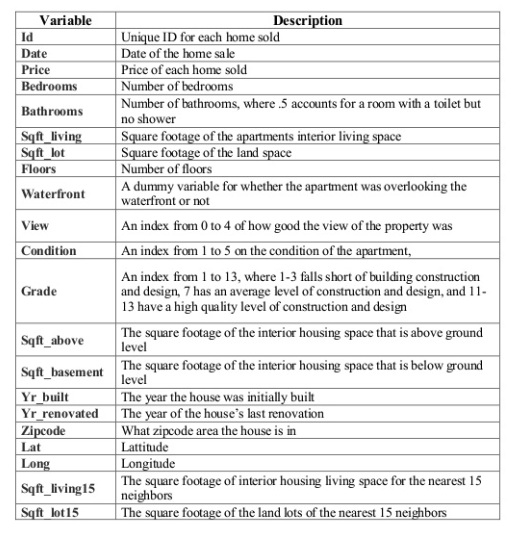

## Preprocessing

### Exploring the Descriptive Statistics of the variables

In [3]:
raw_data.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,21613,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4580301520.86,NaN,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2876565571.31,NaN,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1000102.00,NaN,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049194.00,NaN,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,NaN,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900445.00,NaN,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00


### Determining the variable of interest 

In [4]:
data = raw_data.drop(['date','id'], axis=1)
data.describe(include='all')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


### Dealing with missing values

In [5]:
data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Exploring the PDFs

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


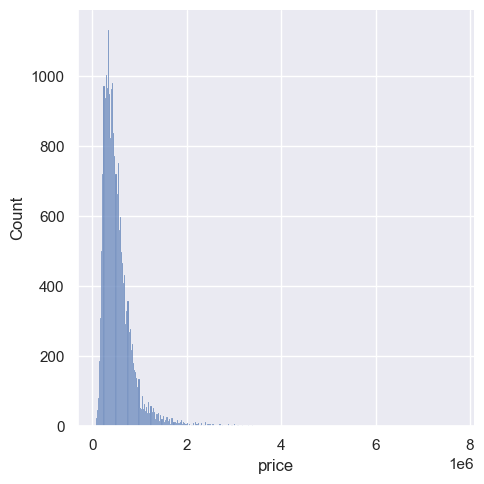

In [6]:
sns.displot(data['price'])

### Dealing with outliers

In [7]:
q = data['price'].quantile(0.99)
data_1 = data[data['price'] < q]
data_1.describe(include='all')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21396.00,21396.00,21396.00,21396.00,21396.00,21396.00,21396.00,21396.00,21396.00,21396.00,21396.00,21396.00,21396.00,21396.00,21396.00,21396.00,21396.00,21396.00,21396.00
mean,518115.33,3.36,2.10,2050.49,14993.24,1.49,0.01,0.22,3.41,7.63,1766.21,284.28,1970.99,82.27,98078.08,47.56,-122.21,1971.61,12696.71
std,284587.46,0.92,0.75,861.41,40979.49,0.54,0.07,0.73,0.65,1.14,791.59,430.40,29.31,396.79,53.47,0.14,0.14,668.10,27203.76
min,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,320000.00,3.00,1.50,1420.00,5026.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.75,0.00,98033.00,47.47,-122.33,1480.00,5100.00
50%,450000.00,3.00,2.25,1900.00,7575.50,1.50,0.00,0.00,3.00,7.00,1550.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1830.00,7600.00
75%,635000.00,4.00,2.50,2520.00,10548.50,2.00,0.00,0.00,4.00,8.00,2190.00,550.00,1997.00,0.00,98118.00,47.68,-122.12,2340.00,10021.25
max,1960000.00,33.00,7.50,7730.00,1651359.00,3.50,1.00,4.00,5.00,13.00,7420.00,3260.00,2015.00,2015.00,98199.00,47.78,-121.31,5790.00,871200.00


C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


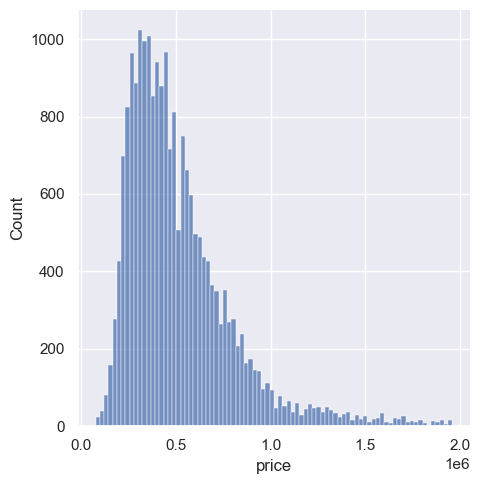

In [8]:
sns.displot(data_1['price'])

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


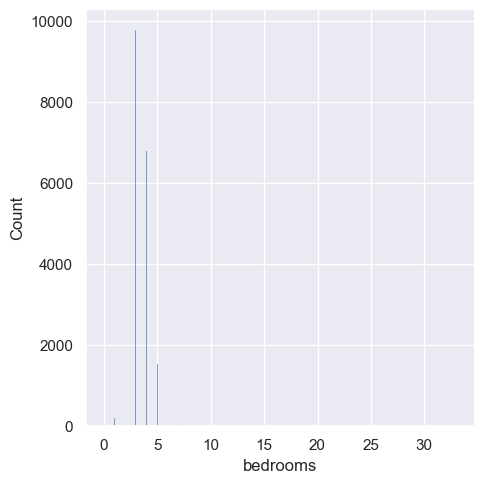

In [9]:
sns.displot(data_1['bedrooms'])

In [10]:
q = data_1['bedrooms'].quantile(0.99)
data_2 = data_1[data_1['bedrooms'] < q]

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


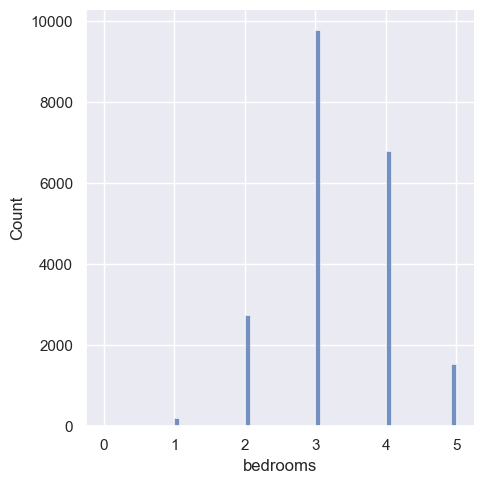

In [11]:
sns.displot(data_2['bedrooms'])

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


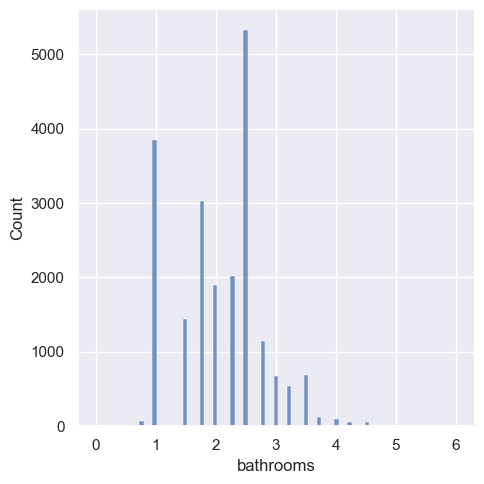

In [12]:
sns.displot(data_2['bathrooms'])

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


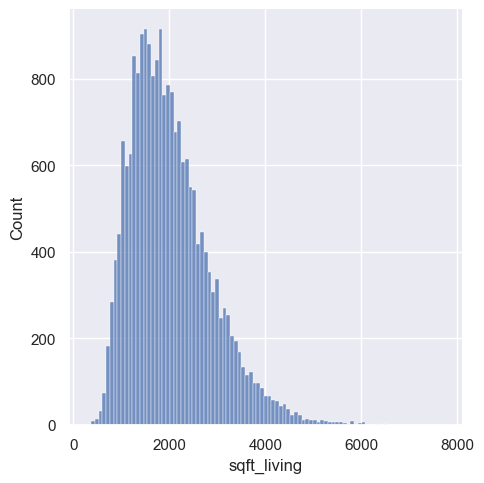

In [13]:
sns.displot(data_2['sqft_living'])

In [14]:
q = data_2['sqft_living'].quantile(0.99)
data_3 = data_2[data_2['sqft_living'] < q]

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


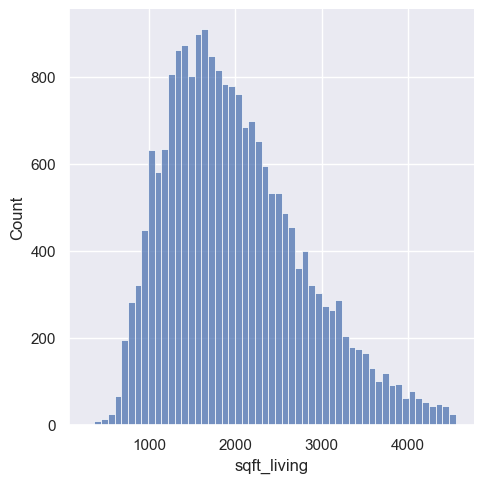

In [15]:
sns.displot(data_3['sqft_living'])

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


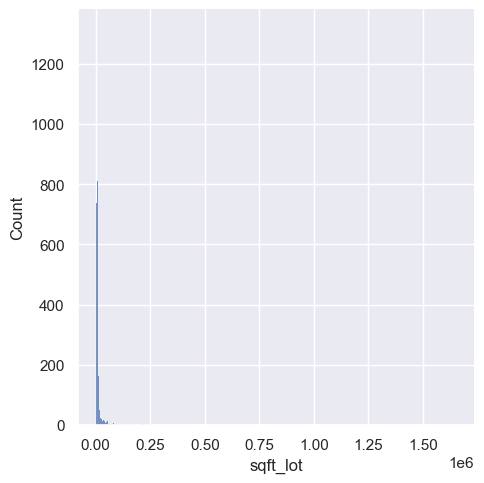

In [16]:
sns.displot(data_3['sqft_lot'])

In [17]:
q = data_3['sqft_lot'].quantile(0.99)
data_4 = data_3[data_3['sqft_lot'] < q]

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


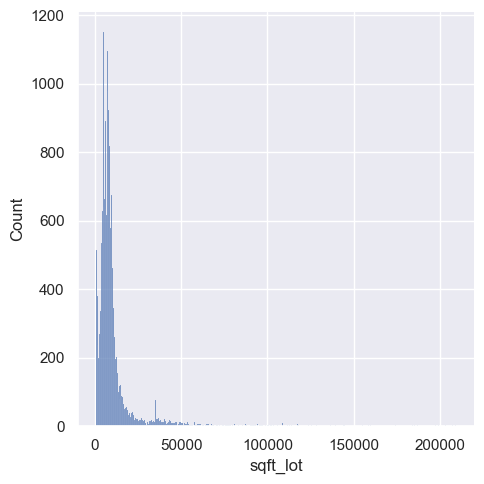

In [18]:
sns.displot(data_4['sqft_lot'])

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


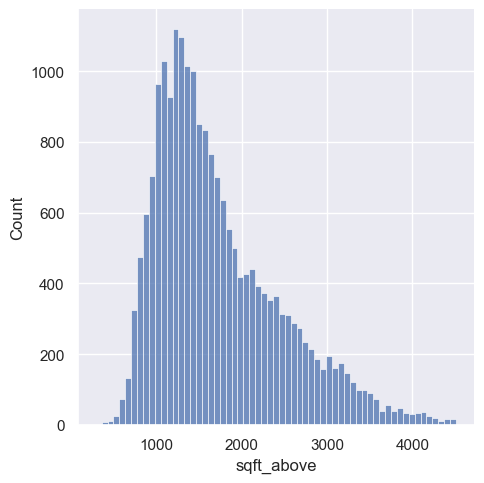

In [19]:
sns.displot(data_4['sqft_above'])

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


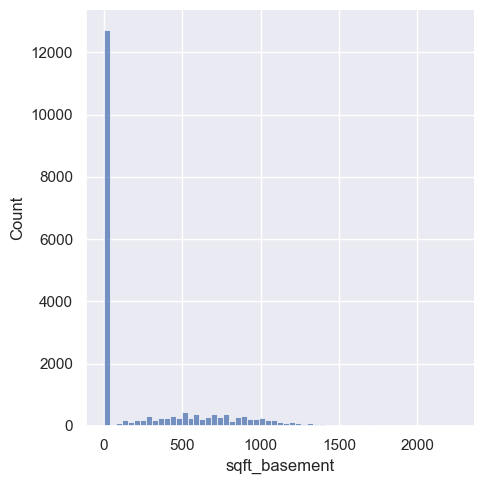

In [20]:
sns.displot(data_4['sqft_basement'])

In [21]:
# data_4 = data_4.drop(['sqft_basement'],axis=1)

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


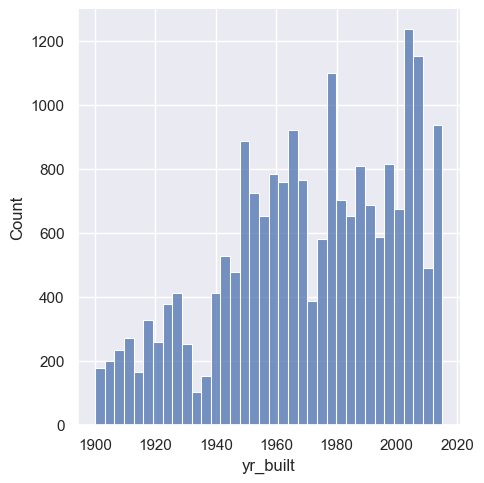

In [22]:
sns.displot(data_4['yr_built'])

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


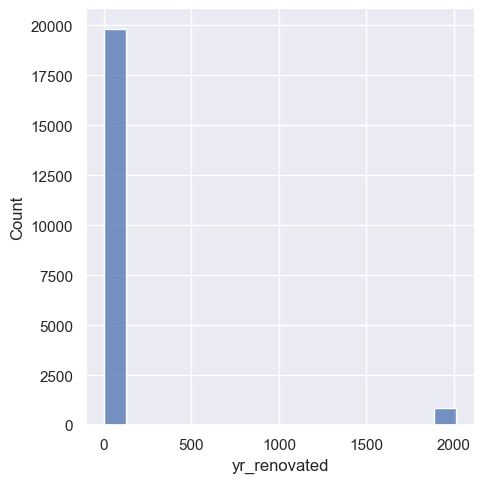

In [23]:
sns.displot(data_4['yr_renovated'])

In [24]:
# data_4 = data_4.drop(['yr_renovated'],axis=1)

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


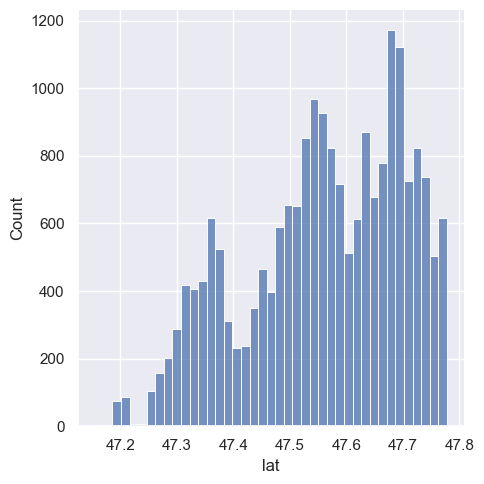

In [25]:
sns.displot(data_4['lat'])

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


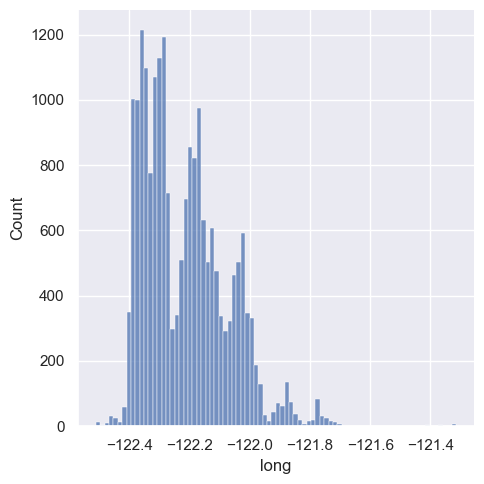

In [26]:
sns.displot(data_4['long'])

In [27]:
q = data_4['long'].quantile(0.99)
data_5 = data_4[data_4['long'] < q]

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


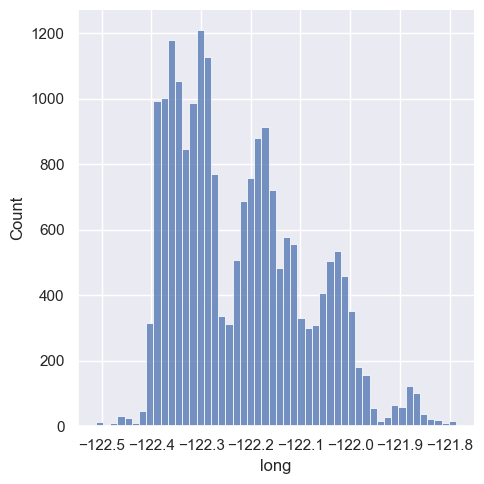

In [28]:
sns.displot(data_5['long'])

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


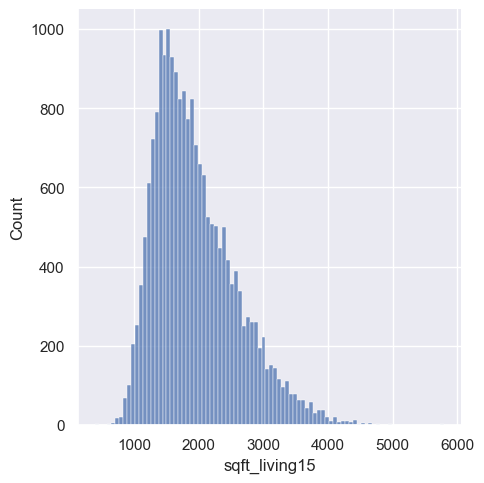

In [29]:
sns.displot(data_5['sqft_living15'])

In [30]:
q = data_5['sqft_living15'].quantile(0.99)
data_6 = data_5[data_5['sqft_living15'] < q]

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


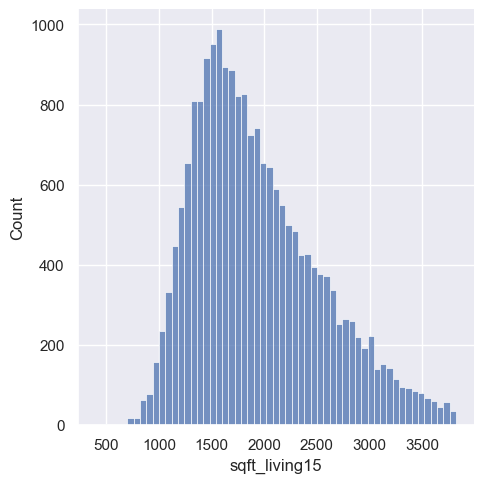

In [31]:
sns.displot(data_6['sqft_living15'])

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


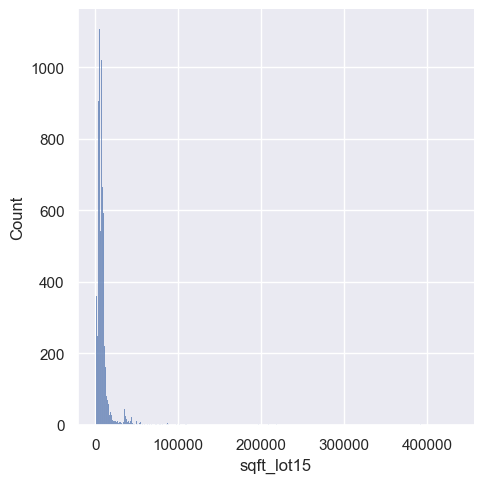

In [32]:
sns.displot(data_6['sqft_lot15'])

In [33]:
q = data_6['sqft_lot15'].quantile(0.99)
data_7 = data_6[data_6['sqft_lot15'] < q]

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


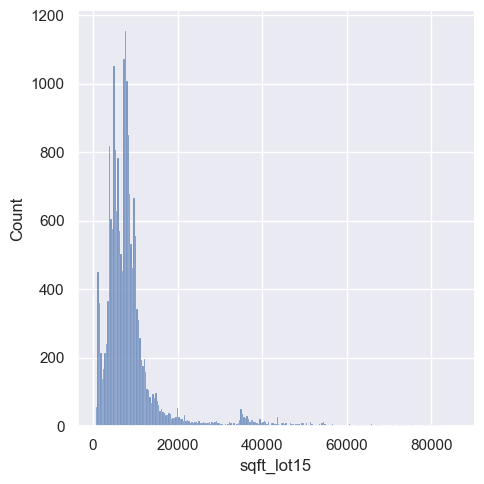

In [34]:
sns.displot(data_7['sqft_lot15'])

In [35]:
data_cleaned = data_7.reset_index(drop=True)

In [36]:
data_cleaned.describe(include='all')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,20038.00,20038.00,20038.00,20038.00,20038.00,20038.00,20038.00,20038.00,20038.00,20038.00,20038.00,20038.00,20038.00,20038.00,20038.00,20038.00,20038.00,20038.00,20038.00
mean,501626.97,3.30,2.05,1973.63,10234.90,1.48,0.01,0.20,3.42,7.56,1701.43,272.20,1970.32,81.28,98079.72,47.56,-122.22,1922.83,9156.24
std,264856.60,0.83,0.70,758.91,13426.57,0.54,0.07,0.69,0.65,1.06,709.46,408.66,29.43,394.50,53.92,0.14,0.13,601.28,8733.48
min,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.18,-122.51,460.00,651.00
25%,315000.00,3.00,1.50,1400.00,5000.00,1.00,0.00,0.00,3.00,7.00,1170.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1470.00,5000.00
50%,440000.00,3.00,2.25,1860.00,7400.00,1.00,0.00,0.00,3.00,7.00,1520.00,0.00,1973.00,0.00,98072.00,47.57,-122.25,1810.00,7473.00
75%,618000.00,4.00,2.50,2440.00,10000.00,2.00,0.00,0.00,4.00,8.00,2100.00,530.00,1996.00,0.00,98118.00,47.68,-122.14,2290.00,9660.00
max,1955000.00,5.00,5.00,4550.00,209088.00,3.50,1.00,4.00,5.00,12.00,4510.00,2250.00,2015.00,2015.00,98199.00,47.78,-121.79,3820.00,85813.00


### Checking the OLS assumptions

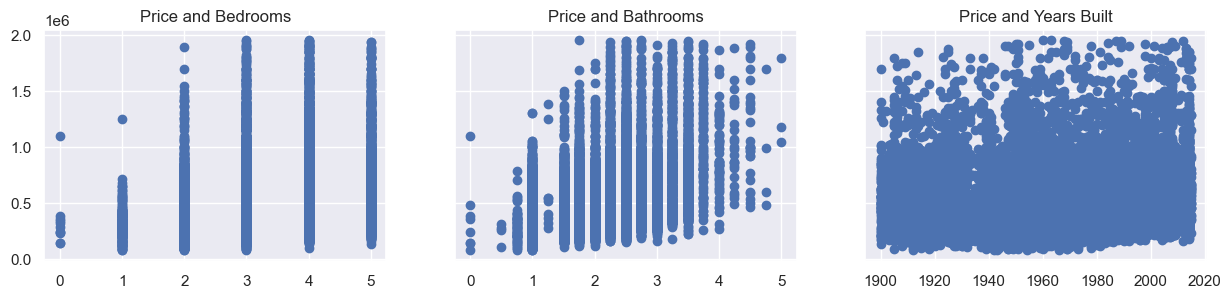

In [37]:
f, (ax1,ax2,ax3) = plt.subplots(1,3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['bedrooms'], data_cleaned['price'])
ax1.set_title('Price and Bedrooms')

ax2.scatter(data_cleaned['bathrooms'], data_cleaned['price'])
ax2.set_title('Price and Bathrooms')

ax3.scatter(data_cleaned['yr_built'], data_cleaned['price'])
ax3.set_title('Price and Years Built')

plt.show()

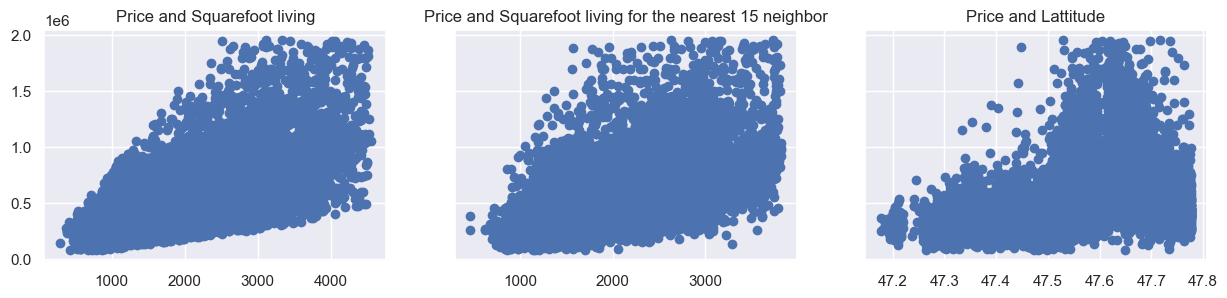

In [38]:
f, (ax1,ax2,ax3) = plt.subplots(1,3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['sqft_living'], data_cleaned['price'])
ax1.set_title('Price and Squarefoot living')

ax2.scatter(data_cleaned['sqft_living15'], data_cleaned['price'])
ax2.set_title('Price and Squarefoot living for the nearest 15 neighbor')

ax3.scatter(data_cleaned['lat'], data_cleaned['price'])
ax3.set_title('Price and Lattitude')

plt.show()

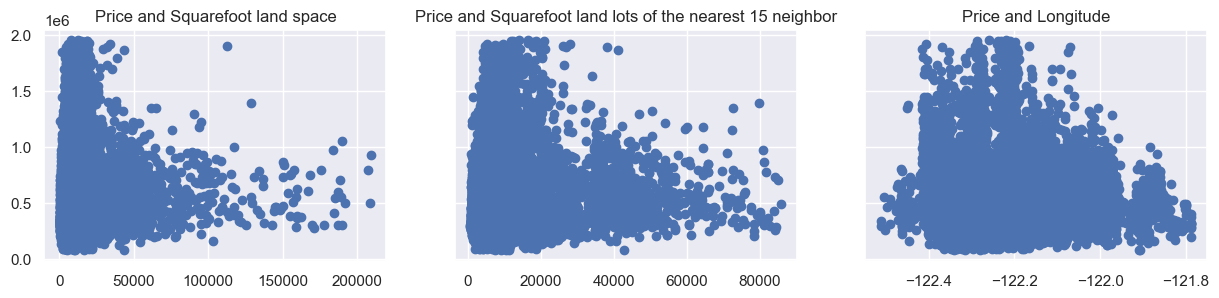

In [39]:
f, (ax1,ax2,ax3) = plt.subplots(1,3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['sqft_lot'], data_cleaned['price'])
ax1.set_title('Price and Squarefoot land space')

ax2.scatter(data_cleaned['sqft_lot15'], data_cleaned['price'])
ax2.set_title('Price and Squarefoot land lots of the nearest 15 neighbor')

ax3.scatter(data_cleaned['long'], data_cleaned['price'])
ax3.set_title('Price and Longitude')

plt.show()

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


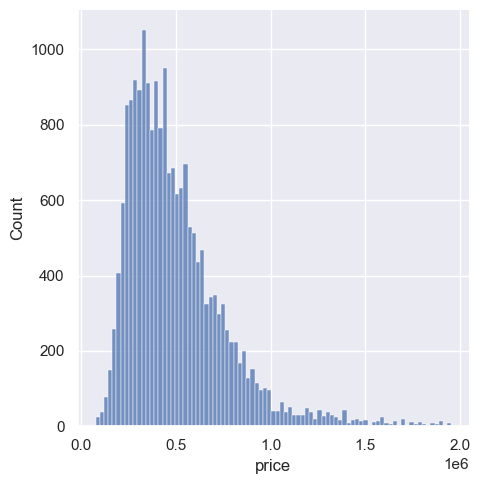

In [40]:
sns.displot(data_cleaned['price'])

### Relaxing the assumptions

In [41]:
log_price = np.log(data_cleaned['price'])
data_cleaned['log_price'] = log_price
data_cleaned

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price
0,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650,12.31
1,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639,13.20
2,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062,12.10
3,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000,13.31
4,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503,13.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20033,360000.00,3,2.50,1530,1131,3.00,0,0,3,8,1530,0,2009,0,98103,47.70,-122.35,1530,1509,12.79
20034,400000.00,4,2.50,2310,5813,2.00,0,0,3,8,2310,0,2014,0,98146,47.51,-122.36,1830,7200,12.90
20035,402101.00,2,0.75,1020,1350,2.00,0,0,3,7,1020,0,2009,0,98144,47.59,-122.30,1020,2007,12.90
20036,400000.00,3,2.50,1600,2388,2.00,0,0,3,8,1600,0,2004,0,98027,47.53,-122.07,1410,1287,12.90


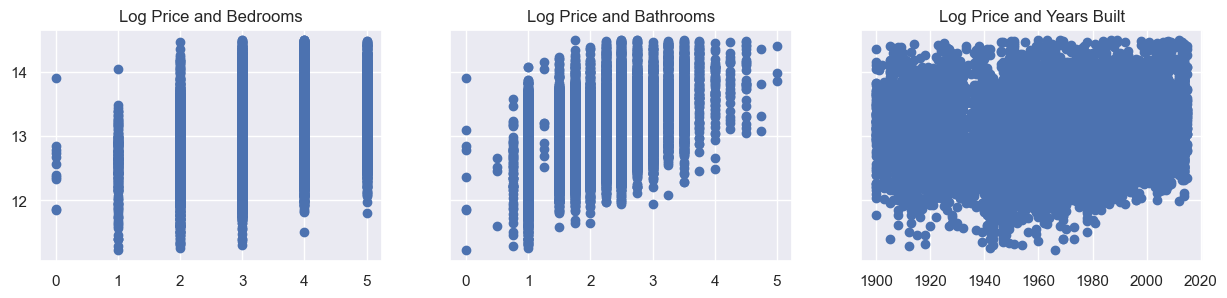

In [42]:
f, (ax1,ax2,ax3) = plt.subplots(1,3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['bedrooms'], data_cleaned['log_price'])
ax1.set_title('Log Price and Bedrooms')

ax2.scatter(data_cleaned['bathrooms'], data_cleaned['log_price'])
ax2.set_title('Log Price and Bathrooms')

ax3.scatter(data_cleaned['yr_built'], data_cleaned['log_price'])
ax3.set_title('Log Price and Years Built')

plt.show()

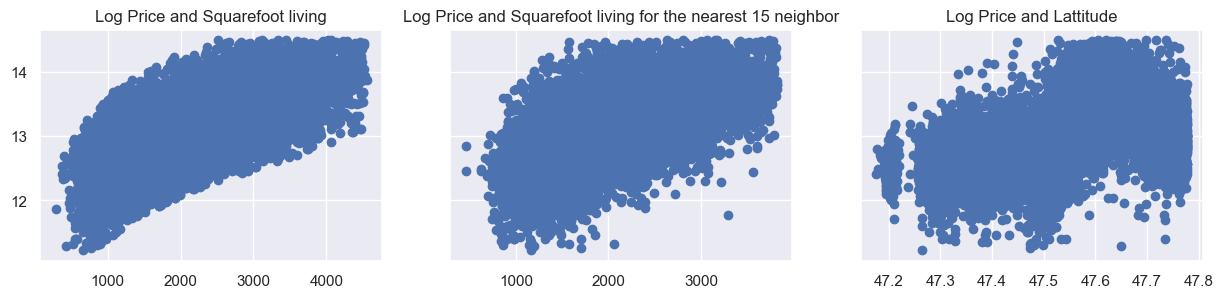

In [43]:
f, (ax1,ax2,ax3) = plt.subplots(1,3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['sqft_living'], data_cleaned['log_price'])
ax1.set_title('Log Price and Squarefoot living')

ax2.scatter(data_cleaned['sqft_living15'], data_cleaned['log_price'])
ax2.set_title('Log Price and Squarefoot living for the nearest 15 neighbor')

ax3.scatter(data_cleaned['lat'], data_cleaned['log_price'])
ax3.set_title('Log Price and Lattitude')

plt.show()

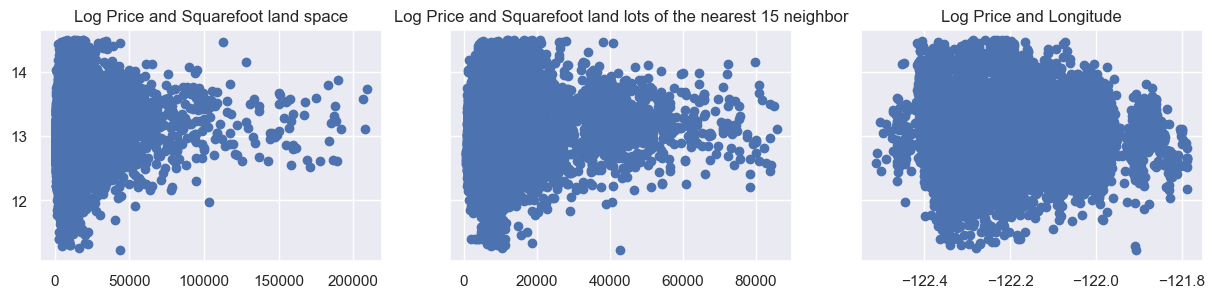

In [44]:
f, (ax1,ax2,ax3) = plt.subplots(1,3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['sqft_lot'], data_cleaned['log_price'])
ax1.set_title('Log Price and Squarefoot land space')

ax2.scatter(data_cleaned['sqft_lot15'], data_cleaned['log_price'])
ax2.set_title('Log Price and Squarefoot land lots of the nearest 15 neighbor')

ax3.scatter(data_cleaned['long'], data_cleaned['log_price'])
ax3.set_title('Log Price and Longitude')

plt.show()

In [45]:
# data_cleaned = data_cleaned.drop(['floors','waterfront','zipcode'], axis=1)

### Multicolinearity

In [46]:
data_cleaned.columns.values

array(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'log_price'], dtype=object)

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['sqft_living','sqft_lot','sqft_above','sqft_living15','sqft_lot15','yr_built','lat','long','bedrooms',
                         'bathrooms']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range (variables.shape[1])]
vif["features"] = variables.columns

In [48]:
vif

,VIF,features
0,47.32,sqft_living
1,3.71,sqft_lot
2,28.32,sqft_above
3,27.70,sqft_living15
4,5.12,sqft_lot15
5,6859.97,yr_built
6,117059.75,lat
7,126382.47,long
8,27.67,bedrooms
9,25.52,bathrooms


In [49]:
# data_no_multicollinearity = data_cleaned.drop(['yr_built','lat','long'], axis=1)
data_no_multicollinearity = data_cleaned

In [50]:
data_no_multicollinearity.columns.values

array(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'log_price'], dtype=object)

## Linear regression model

### Declare the inputs and the targets

In [51]:
targets = data_no_multicollinearity['log_price']
inputs = data_no_multicollinearity.drop(['log_price','price'],axis=1)

# targets = data_no_multicollinearity['price']
# inputs = data_no_multicollinearity.drop(['log_price','price'],axis=1)

### Scale the data

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [53]:
input_scaled = scaler.transform(inputs)

### Train Test Split

In [54]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(input_scaled, targets, test_size=0.2, random_state=1)

### Create the regression

In [55]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [56]:
y_hat = reg.predict(x_train)

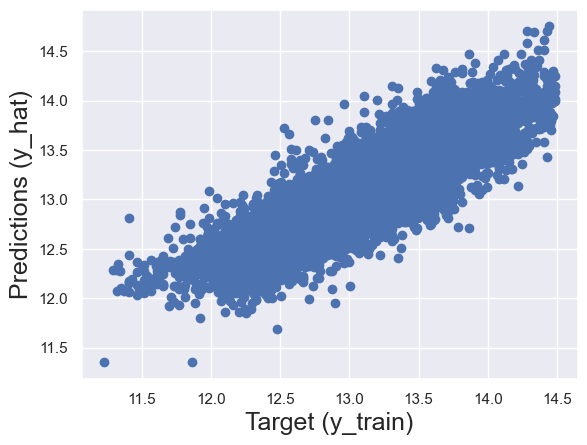

In [57]:
plt.scatter(y_train,y_hat)
plt.xlabel('Target (y_train)', size =18)
plt.ylabel('Predictions (y_hat)', size=18)
plt.show()

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Residuals PDF')

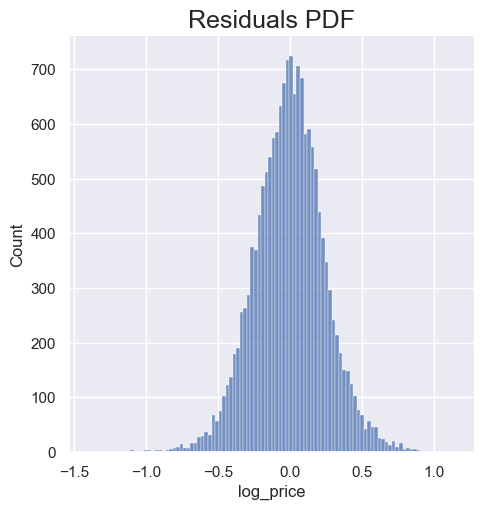

In [58]:
sns.displot(y_train - y_hat)
plt.title("Residuals PDF", size =18)

### Calculating the R-squared

In [59]:
reg.score(x_train,y_train)

0.7417060451096449

### Finding the weights and bias

In [60]:
reg.intercept_

13.00613095476025

In [61]:
reg.coef_

array([-1.46552381e-02,  4.62039077e-02, -8.67225039e+11,  1.63117052e-02,
        4.11866117e-02,  2.73248033e-02,  4.16417594e-02,  4.07876424e-02,
        1.65264793e-01,  8.10711018e+11,  4.66985093e+11, -1.06139112e-01,
        1.43829777e-02, -3.22082421e-02,  1.96029057e-01, -1.20245046e-02,
        6.66825179e-02, -3.17223500e-02])

In [62]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,bedrooms,-0.01
1,bathrooms,0.05
2,sqft_living,-867225039421.85
3,sqft_lot,0.02
4,floors,0.04
5,waterfront,0.03
6,view,0.04
7,condition,0.04
8,grade,0.17
9,sqft_above,810711017520.80


### Testing

In [63]:
y_hat_test = reg.predict(x_test)

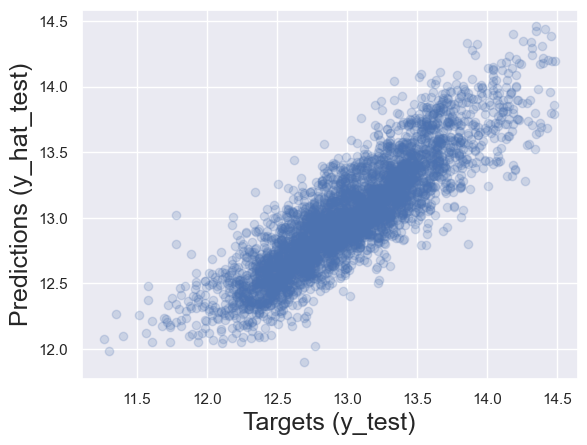

In [64]:
plt.scatter(y_test,y_hat_test,alpha=0.2)
plt.xlabel('Targets (y_test)', size=18)
plt.ylabel('Predictions (y_hat_test)', size=18)
plt.show()

In [65]:
df_pf = pd.DataFrame(np.exp(y_hat_test),columns=['Prediction'])
df_pf.head()

,Prediction
0,388684.53
1,253767.86
2,266462.87
3,447913.86
4,441432.30


In [66]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,388684.53,NaN
1,253767.86,NaN
2,266462.87,NaN
3,447913.86,NaN
4,441432.30,510000.00
...,...,...
4003,505630.31,240415.00
4004,866946.29,NaN
4005,671998.31,360000.00
4006,592899.86,NaN


In [67]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0   12.89
1   12.61
2   12.51
3   13.29
4   13.30
Name: log_price, dtype: float64

In [ ]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,388684.53,397500.00
1,253767.86,300000.00
2,266462.87,270000.00
3,447913.86,592500.00
4,441432.30,600000.00
...,...,...
4003,505630.31,433000.00
4004,866946.29,635000.00
4005,671998.31,729000.00
4006,592899.86,430000.00


In [ ]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [ ]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,388684.53,397500.00,8815.47,2.22
1,253767.86,300000.00,46232.14,15.41
2,266462.87,270000.00,3537.13,1.31
3,447913.86,592500.00,144586.14,24.40
4,441432.30,600000.00,158567.70,26.43
...,...,...,...,...
4003,505630.31,433000.00,-72630.31,16.77
4004,866946.29,635000.00,-231946.29,36.53
4005,671998.31,729000.00,57001.69,7.82
4006,592899.86,430000.00,-162899.86,37.88


In [ ]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,4008.00,4008.00,4008.00,4008.00
mean,489339.04,506576.99,17237.95,19.44
std,226998.19,271815.24,145596.39,17.40
min,146604.90,78000.00,-631444.31,0.00
25%,329802.85,311000.00,-61052.03,7.50
50%,439382.51,441750.00,4148.18,15.34
75%,583527.31,626387.50,73317.80,26.42
max,1903464.99,1950000.00,989832.46,246.24


In [ ]:
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
225,458518.82,458500.00,-18.82,0.00
3721,600044.10,600000.00,-44.10,0.01
3876,230026.97,230000.00,-26.97,0.01
3575,289459.16,289500.00,40.84,0.01
3001,1480534.11,1480000.00,-534.11,0.04
...,...,...,...,...
2201,540194.14,229000.00,-311194.14,135.89
3322,262823.16,107000.00,-155823.16,145.63
3355,212093.51,85000.00,-127093.51,149.52
3833,362338.78,130000.00,-232338.78,178.72
